In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [17]:
from imblearn.over_sampling import SMOTE

Data Exploration and Preprocessing

In [4]:
# Specify the directory path
directory = "./csv/train"

# List all files in the directory
file_name = os.listdir(directory)


In [7]:
def attack_type(filename):
    if "MQTT" in filename:
        return "MQTT"
    elif "DDoS" in filename:
        return "DDoS"
    elif "DoS" in filename:
        return "DoS"
    elif "Recon" in filename:
        return "Recon"
    elif "Spoofing" in filename:
        return "Spoofing"
    elif "Benign" in filename:
        return "Benign"
    else:
        return "Unknown"

In [6]:
# Load and concatenate all CSV files into one dataframe.
df_list = []
for file in file_name:
    df = pd.read_csv(os.path.join(directory, file))
    # Extract the filename from the file path and add it as a new column.
    filename = os.path.basename(file).split('.')[0]
    df['file_name'] = filename
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

Basic Statistics

In [5]:
combined_df.describe()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7160831.0,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,...,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06
mean,2.958836e+04,8.042957e+00,6.474653e+01,1.523202e+04,1.523202e+04,0.0,5.079549e-03,1.587609e-01,3.862139e-02,2.240655e-02,...,6.083868e+01,6.405743e+00,6.084036e+01,8.468349e+07,9.499081e+00,1.045008e+01,9.047367e+00,2.535226e+03,9.148464e-02,1.415273e+02
std,2.762618e+05,6.292201e+00,8.405262e+00,3.950968e+04,3.950968e+04,0.0,3.411170e-02,3.388233e-01,1.371016e-01,9.713147e-02,...,8.809625e+01,3.917360e+01,8.787628e+01,1.788442e+07,8.446717e-01,3.169197e+00,5.538149e+01,2.045832e+04,2.327133e-01,2.174138e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,-1.282061e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.400000e+01,1.160000e+00,6.400000e+01,6.685014e+00,6.685014e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.232938e+01,0.000000e+00,4.258000e+01,8.467888e+07,9.500000e+00,9.199377e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,1.080000e+02,6.000000e+00,6.400000e+01,1.452887e+02,1.452887e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.469641e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.958050e+04,1.700000e+01,6.400000e+01,1.914681e+04,1.914681e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.469686e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
max,9.895636e+06,1.700000e+01,2.550000e+02,2.097152e+06,2.097152e+06,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.514000e+03,7.211509e+02,1.514000e+03,1.694694e+08,1.500000e+01,5.502727e+01,1.020232e+03,5.204379e+05,1.000000e+00,2.446000e+02


In [8]:
combined_df[:10]

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,file_name
0,866.6,10.4,64.0,45722.390222,45722.390222,0.0,0.0,0.0,0.0,0.3,...,150.681076,431.8,1.694026e+08,5.5,16.963645,213.095221,66236.076476,0.9,38.5,ARP_Spoofing_train
1,3934.3,12.6,131.2,35708.799475,35708.799475,0.0,0.0,0.0,0.0,0.3,...,500.702909,406.3,1.694026e+08,13.5,30.885371,708.919620,251721.126817,1.0,244.6,ARP_Spoofing_train
2,5592.8,12.6,97.6,66.403506,66.403506,0.0,0.0,0.0,0.0,0.3,...,205.552035,386.6,1.361110e-02,5.5,21.787095,290.694475,84028.647525,0.9,38.5,ARP_Spoofing_train
3,9303.6,14.8,80.8,51.201280,51.201280,0.0,0.0,0.0,0.0,0.1,...,421.683660,300.2,1.694026e+08,13.5,26.954506,597.046005,178453.001691,1.0,244.6,ARP_Spoofing_train
4,8592.4,12.6,98.6,42.706455,42.706455,0.0,0.0,0.0,0.0,0.2,...,265.394239,209.2,1.393099e-02,5.5,24.255148,375.324132,80115.110731,0.9,38.5,ARP_Spoofing_train
5,12734.7,14.8,76.8,42.891720,42.891720,0.0,0.0,0.0,0.0,0.2,...,300.570871,309.8,1.694026e+08,13.5,23.150416,425.844681,91240.161372,1.0,244.6,ARP_Spoofing_train
6,11107.5,12.6,69.9,1746.561424,1746.561424,0.0,0.0,0.0,0.0,0.1,...,301.182080,286.6,1.768470e-02,5.5,28.183235,425.935783,101266.590518,0.9,38.5,ARP_Spoofing_train
7,223.4,6.0,64.0,23763.400870,23763.400870,0.0,0.0,0.0,0.0,0.5,...,286.341910,80.4,1.694026e+08,13.5,20.927489,405.686400,82699.427056,1.0,244.6,ARP_Spoofing_train
8,16821.0,15.9,64.0,39.135576,39.135576,0.0,0.0,0.0,0.0,0.0,...,319.565192,296.0,1.493080e-02,5.5,24.813987,451.933428,114810.181007,0.9,38.5,ARP_Spoofing_train
9,23523.4,17.0,64.0,46.179445,46.179445,0.0,0.0,0.0,0.0,0.0,...,299.020966,296.8,1.694026e+08,13.5,24.055214,423.696257,89871.682698,1.0,244.6,ARP_Spoofing_train


In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160831 entries, 0 to 7160830
Data columns (total 46 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Header_Length    float64
 1   Protocol Type    float64
 2   Duration         float64
 3   Rate             float64
 4   Srate            float64
 5   Drate            float64
 6   fin_flag_number  float64
 7   syn_flag_number  float64
 8   rst_flag_number  float64
 9   psh_flag_number  float64
 10  ack_flag_number  float64
 11  ece_flag_number  float64
 12  cwr_flag_number  float64
 13  ack_count        float64
 14  syn_count        float64
 15  fin_count        float64
 16  rst_count        float64
 17  HTTP             float64
 18  HTTPS            float64
 19  DNS              float64
 20  Telnet           float64
 21  SMTP             float64
 22  SSH              float64
 23  IRC              float64
 24  TCP              float64
 25  UDP              float64
 26  DHCP             float64
 27  ARP         

Check for missing values and outliers

In [9]:
# Check for missing rows
if combined_df.isnull().any(axis=1).sum() > 0:
    print('Missing rows detected')

In [7]:
combined_df['attack_group'] = combined_df['file_name'].apply(attack_type)

Exploratory Data Analysis (EDA)

Distribution of features.

In [7]:
benign_df = combined_df.loc[combined_df['attack_group']=='Benign']
mal_df = combined_df.loc[combined_df['attack_group']!='Benign']

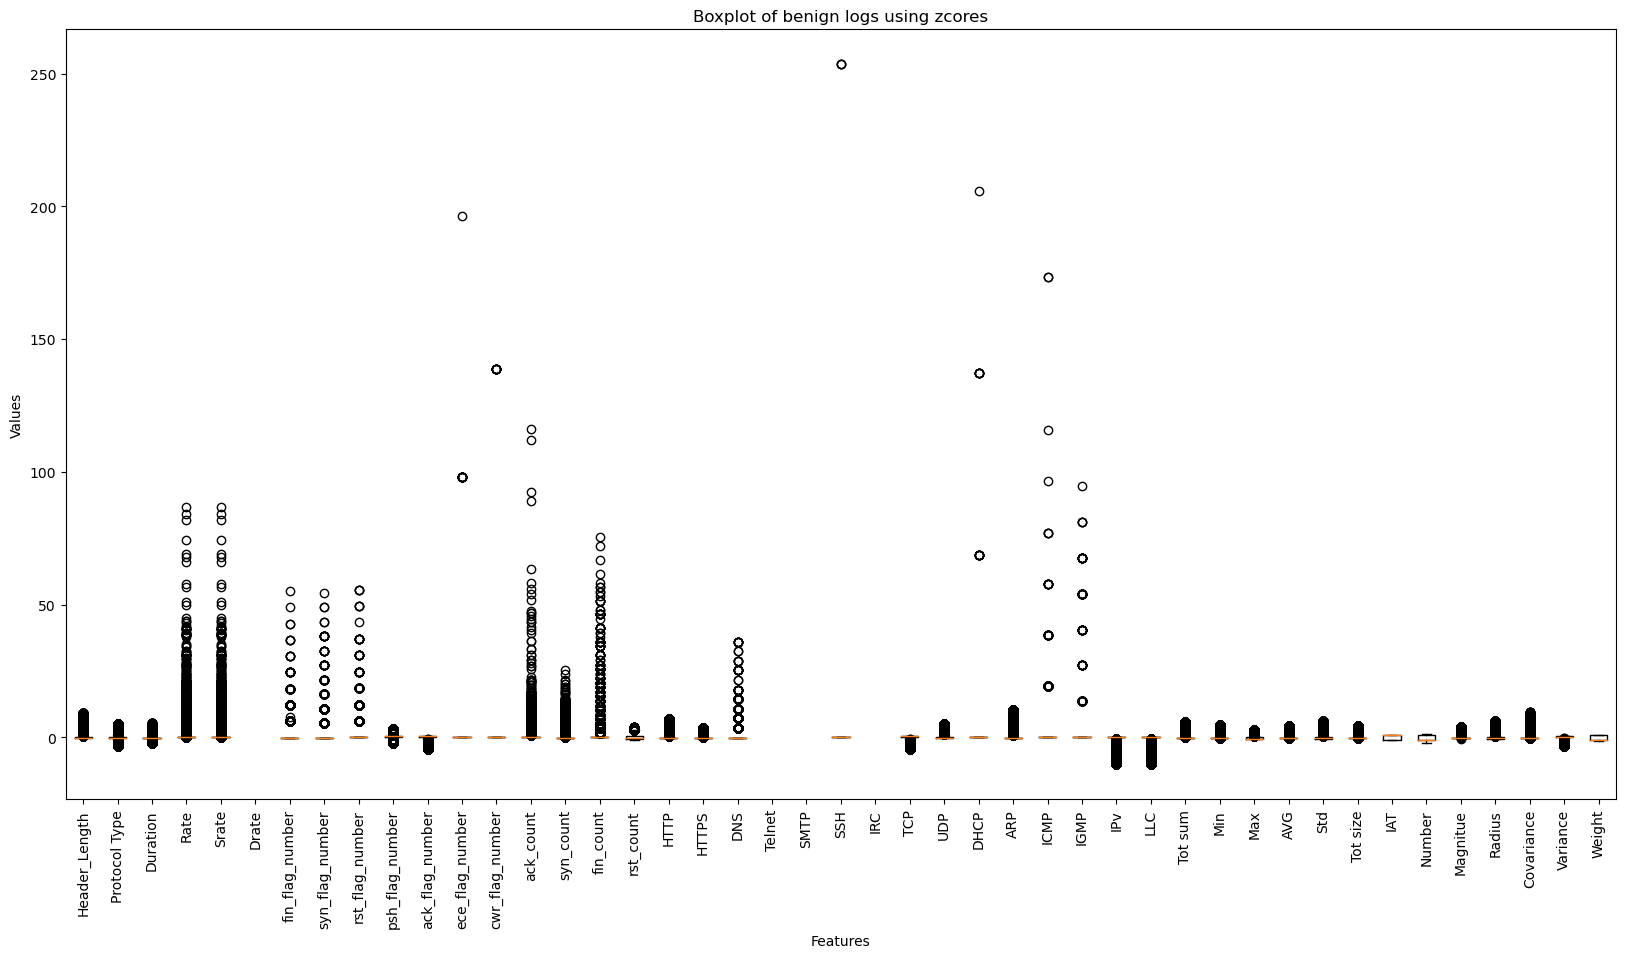

In [24]:
zscores = benign_df.iloc[:,:-2].copy()
for feature in list(zscores.columns):
    zscores[feature] = (zscores[feature] - zscores[feature].mean()) /  zscores[feature].std()

features = zscores.columns
data = [zscores[col].values for col in features]

fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot(data, labels=list(features))

_ = plt.xticks(rotation=90)
_ = plt.xlabel('Features')
_ = plt.ylabel('Values')
_ = plt.title('Boxplot of benign logs using zcores')

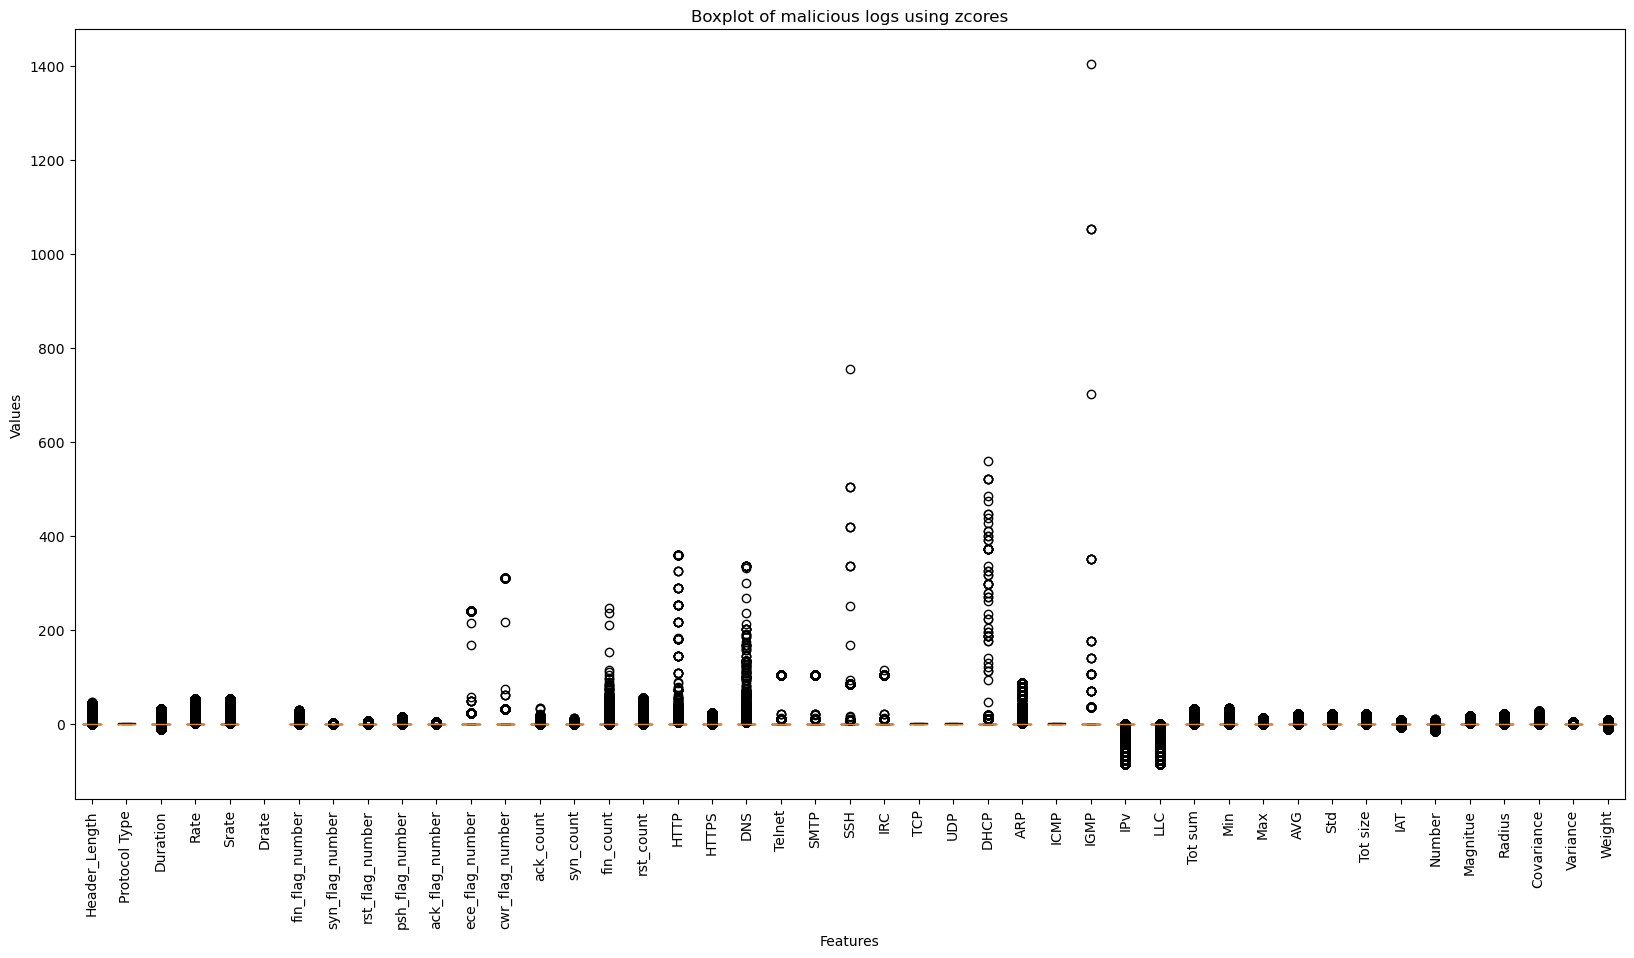

In [23]:
zscores = mal_df.iloc[:,:-2].copy()
for feature in list(zscores.columns):
    zscores[feature] = (zscores[feature] - zscores[feature].mean()) /  zscores[feature].std()
    
features = zscores.columns
data = [zscores[col].values for col in features]

fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot(data, labels=list(features))

_ = plt.xticks(rotation=90)
_ = plt.xlabel('Features')
_ = plt.ylabel('Values')
_ = plt.title('Boxplot of malicious logs using zcores')


In [10]:
qscores = combined_df.iloc[:,:-2].copy()
for features in list(qscores.columns):
    qscores[features] = (qscores[features] - qscores[features].quantile(q=0.25) ) / ( qscores[features].quantile(q=0.75) - qscores[features].quantile(q=0.25))

C:\Users\mahin\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


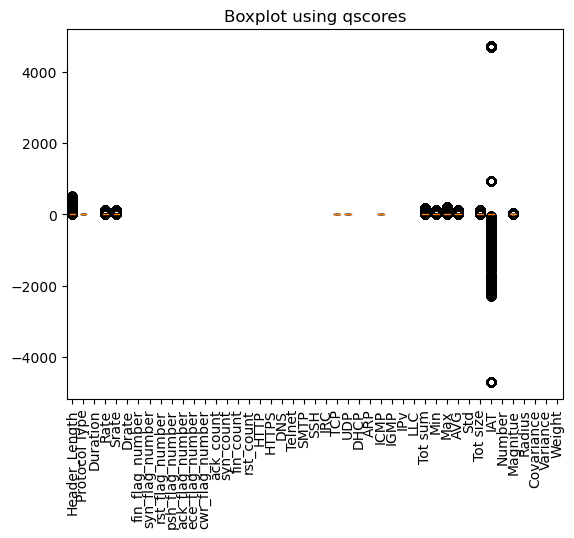

In [11]:
_ = plt.boxplot(qscores, labels=list(qscores.columns))
_ = plt.xticks(rotation=90)
_ = plt.title('Boxplot using qscores')

Distribution of Attack Groups

In [43]:
# Create a DataFrame to store the attack types
data = pd.DataFrame(file_name, columns=['File'])

# Extract attack types from file names
data['Attack Type'] = data['File'].apply(attack_type)

# Count the occurrences of each attack type
attack_type_counts = data['Attack Type'].value_counts()

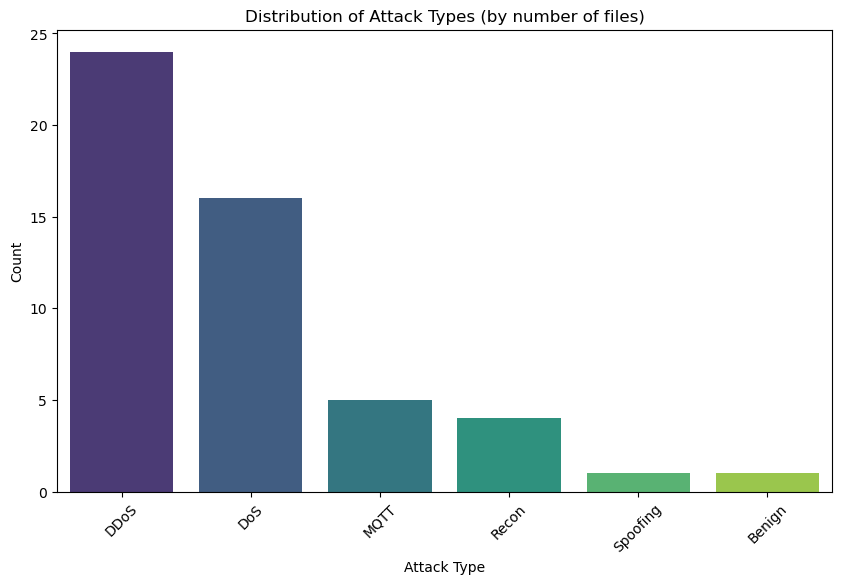

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values, palette="viridis")
plt.title("Distribution of Attack Types (by number of files)")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

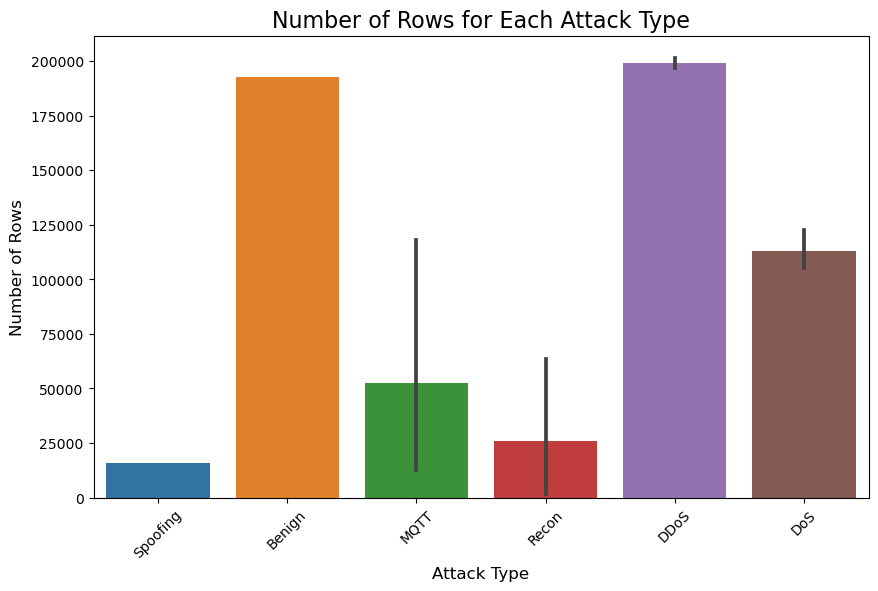

In [12]:
data['File_size'] = data['File'].apply(lambda x: pd.read_csv(os.path.join(directory, x)).shape[0])

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Attack Type', y='File_size', data=data)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)
plt.title('Number of logs for Each Attack Type', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [7]:
directory = "./csv/train"

# Define a function to load CSV files and extract relevant features
def load_and_extract_features(file_path):
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print("Error reading file:", e)
    relevant_features = df[['Header_Length', 'ack_count','syn_count', 'fin_count']]
    return relevant_features

# List all files in the directory
files = os.listdir(directory)

# Dictionary to store features for each attack type
attack_features = {attack_type: [] for attack_type in ['DDoS', 'DoS', 'Recon', 'Spoofing', 'MQTT', 'Benign']}

# Loop through each file
for file in files:
    # Extract attack type from the filename
    for attack_type in ['DDoS', 'DoS', 'Recon', 'Spoofing', 'MQTT', 'Benign']:
        if attack_type in file:
            attack_type_file = attack_type
            break
    else:
        print(f"Attack type not found in file: {file}")
        continue
    
    # Load CSV file and extract features
    file_path = os.path.join(directory, file)
    
    features = load_and_extract_features(file_path)
    if features is not None:
        attack_features[attack_type_file].append(features)


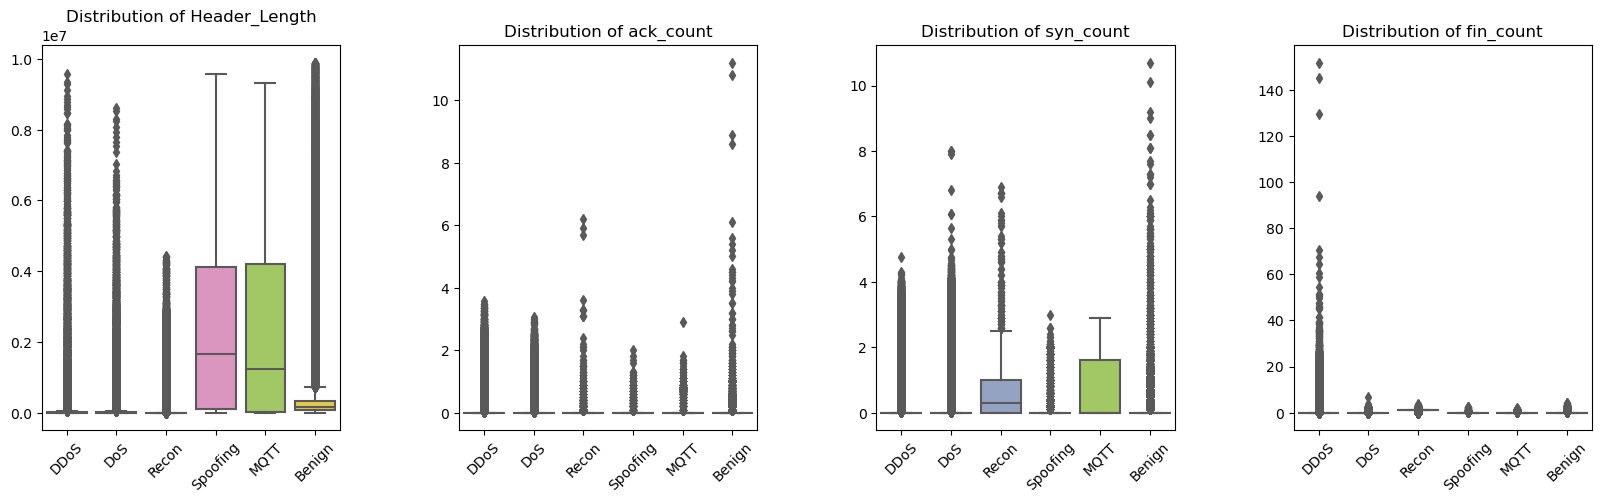

In [14]:
# Concatenate the features for each attack type into a single DataFrame
attack_features_df = {}
for attack_type, features_list in attack_features.items():
    attack_features_df[attack_type] = pd.concat(features_list, ignore_index=True)

# Plot box plots for each feature across attack types
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for i, feature in enumerate(['Header_Length', 'ack_count', 'syn_count', 'fin_count']):
    sns.boxplot(data=[attack_features_df[attack_type][feature] for attack_type in attack_features_df.keys()],
                ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xticklabels(attack_features_df.keys(), rotation=45)

plt.subplots_adjust(wspace=0.4)
plt.show()

 Relationships between Features

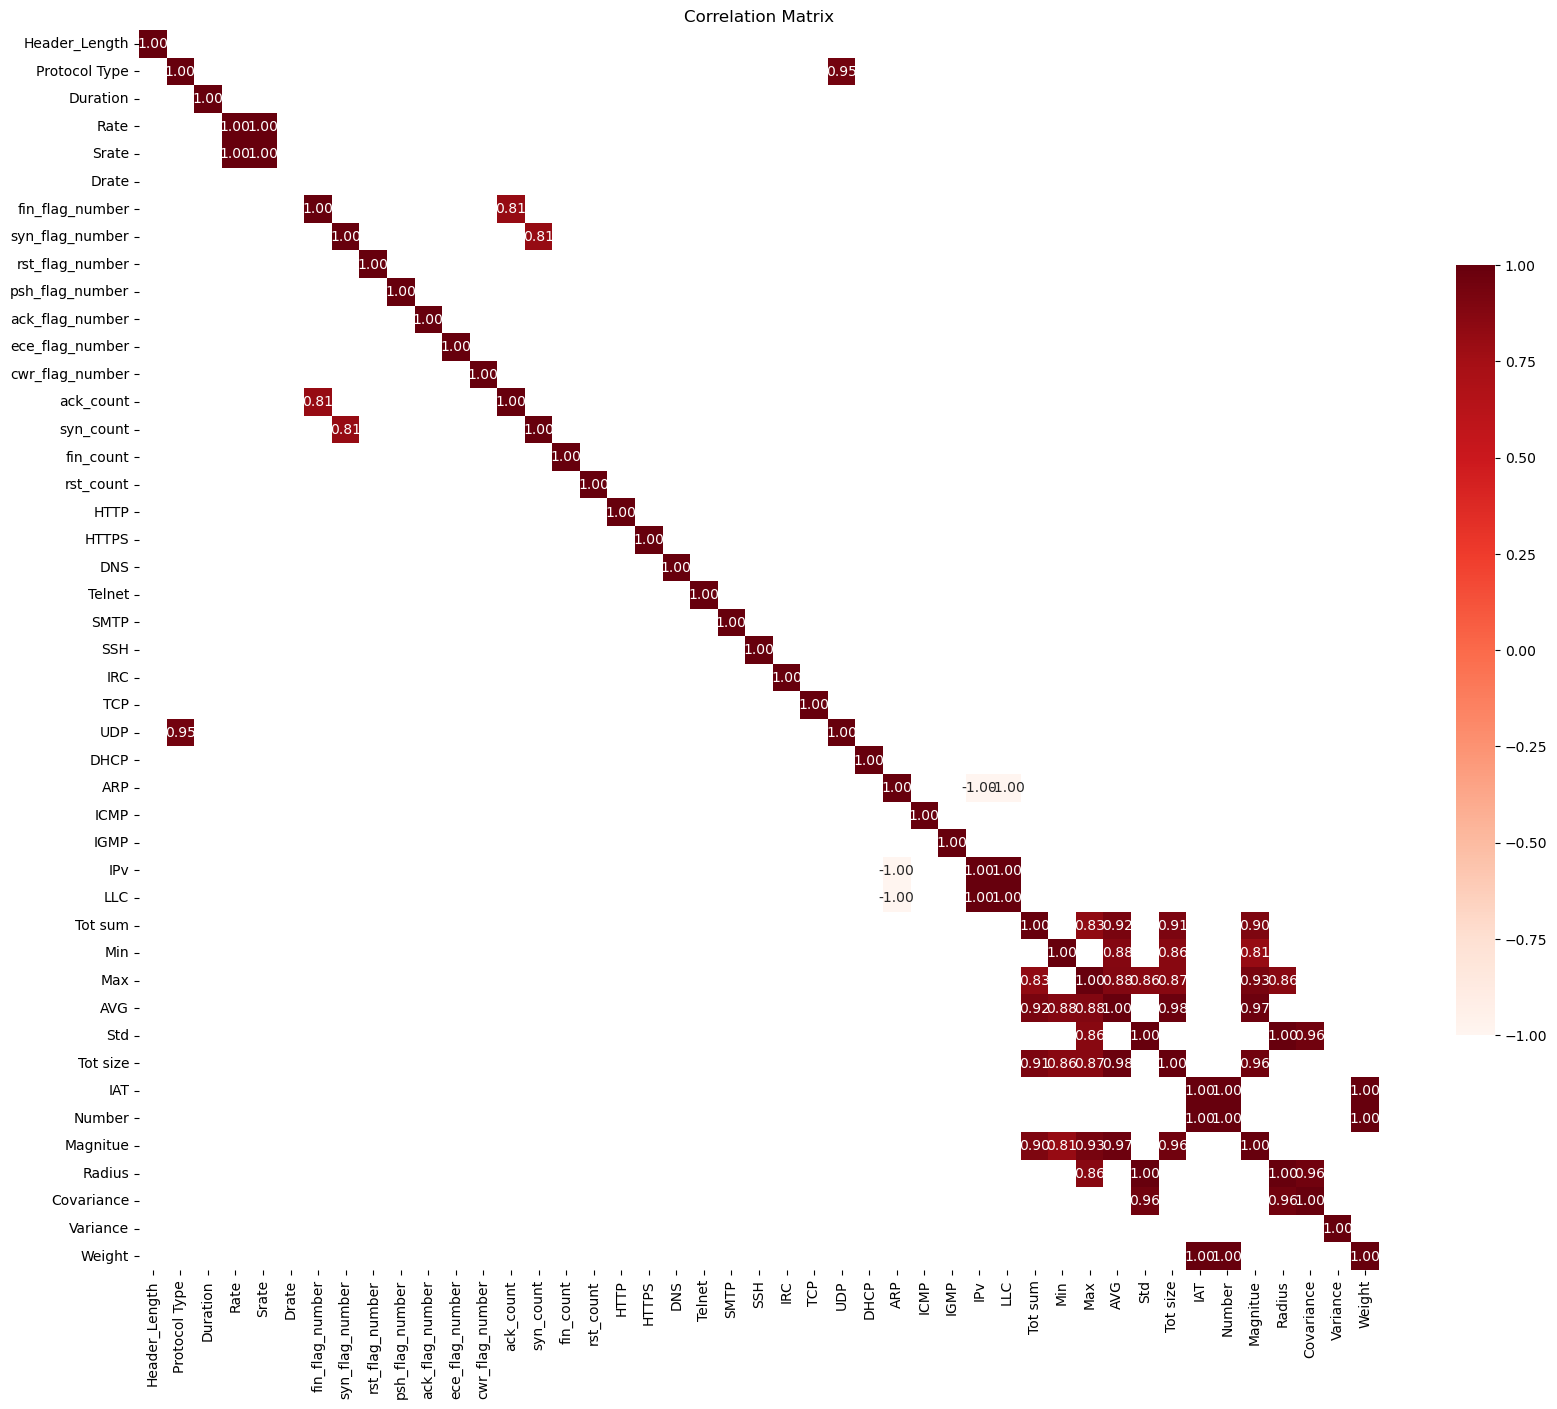

In [19]:
# Compute the correlation matrix
correlation_matrix = combined_df.drop(columns=['attack_group', 'file_name']).corr()
threshold = 0.8
mask =  (np.abs(correlation_matrix) < threshold)
# Plot the heatmap
plt.figure(figsize=(20, 20))  # Adjust the size as needed
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='Reds', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

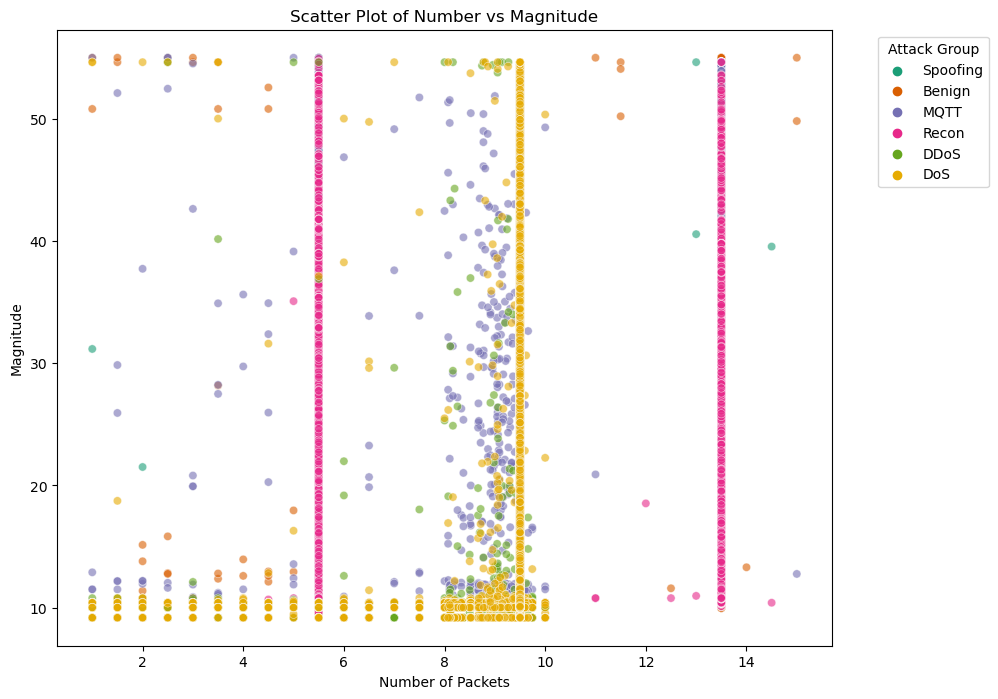

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='Number', y='Magnitue', hue='attack_group', palette='Dark2', alpha=0.6)
plt.title('Scatter Plot Magnitude vs no. of packets')
plt.xlabel('Number of Packets')
plt.ylabel('Magnitude')
plt.legend(title='Attack Group', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
pca_data = combined_df.drop(columns=['attack_group', 'file_name'])

scaler = StandardScaler()
X_std = scaler.fit_transform(pca_data)

In [30]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

principal_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
principal_df['Attack Type'] = combined_df['attack_group']

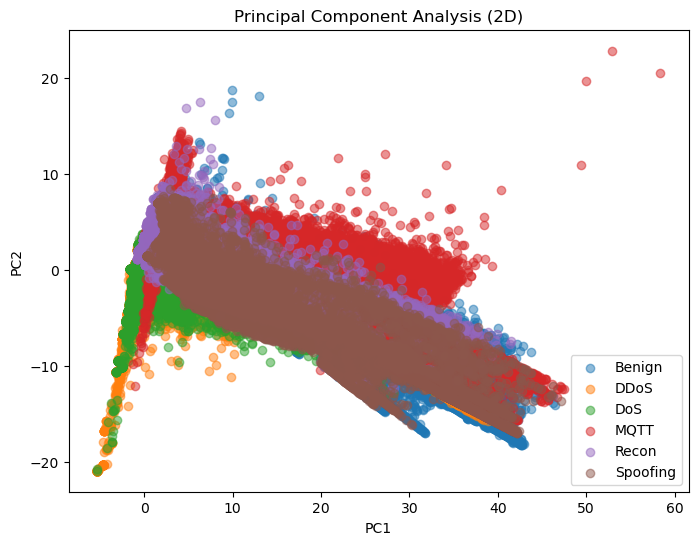

In [31]:
plt.figure(figsize=(8, 6))
for attack_type, group in principal_df.groupby('Attack Type'):
    plt.scatter(group['PC1'], group['PC2'], label=attack_type, alpha=0.5)
plt.title('Principal Component Analysis (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

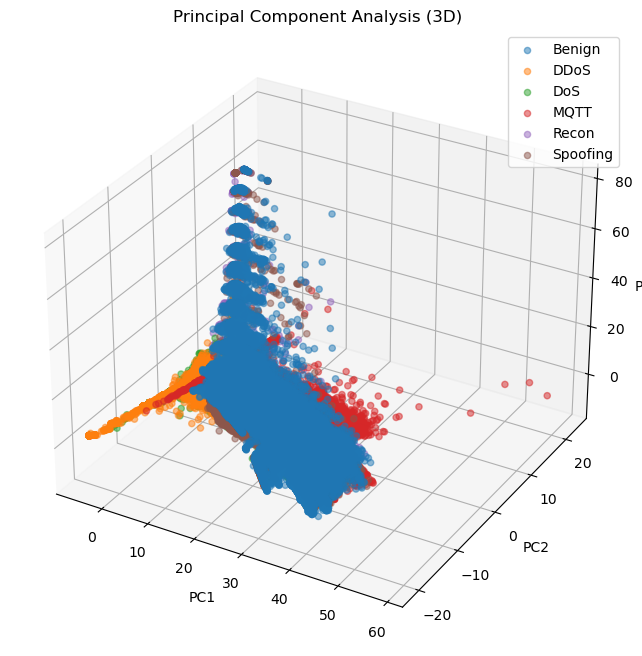

In [32]:
# 3D scatter plot (optional)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for attack_type, group in principal_df.groupby('Attack Type'):
    ax.scatter(group['PC1'], group['PC2'], group['PC3'], label=attack_type, alpha=0.5)
ax.set_title('Principal Component Analysis (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

Feature Engineering 

Flag Counts. 

In [8]:
combined_df['total_flags'] = combined_df[['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 
                'psh_flag_number', 'ack_flag_number', 
                'ece_flag_number', 'cwr_flag_number']].sum(axis=1)

Convert the categorical data to numerical format

In [9]:
df = combined_df.drop(columns=['file_name'])
df['attack_group'] = df['attack_group'].astype('category').cat.codes

In [10]:
threshold = np.percentile(df['Rate'], 95)
combined_df['high_rate_flag'] = (combined_df['Rate'] > threshold).astype(int)

Preparing data for binary classification

In [11]:
combined_df['attack_group_binary'] = np.where(combined_df['attack_group'] == 'Benign', 0, 1)

In [12]:
x_train = combined_df.drop(columns=['file_name', 'attack_group', 'attack_group_binary'])
y_train = combined_df['attack_group_binary']

In [5]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(x_train)

In [8]:
# Specify the directory path for test files
directory = "./csv/test"

# List all files in the directory
file_name = os.listdir(directory)

# Load and concatenate all CSV files into one dataframe.
df_list = []
for file in file_name:
    df = pd.read_csv(os.path.join(directory, file))
    # Extract the filename from the file path and add it as a new column.
    filename = os.path.basename(file).split('.')[0]
    df['file_name'] = filename
    df_list.append(df)

combined_df_test = pd.concat(df_list, ignore_index=True)

combined_df_test['attack_group'] = combined_df_test['file_name'].apply(attack_type)
threshold = np.percentile(df['Rate'], 95)
combined_df_test['high_rate_flag'] = (combined_df_test['Rate'] > threshold).astype(int)
combined_df_test['total_flags'] = combined_df_test[['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 
                'psh_flag_number', 'ack_flag_number', 
                'ece_flag_number', 'cwr_flag_number']].sum(axis=1)
combined_df_test['attack_group_binary'] = np.where(combined_df_test['attack_group'] == 'Benign', 0, 1)

x_test = combined_df_test.drop(columns=['file_name', 'attack_group', 'attack_group_binary'])
y_test = combined_df_test['attack_group_binary']
X_test_scaled = scaler.fit_transform(x_test)

x_test_mc  = combined_df_test.drop(columns=['file_name', 'attack_group', 'attack_group_binary'])
y_test_mc = combined_df_test['attack_group']
X_test_scaled_mc = scaler.fit_transform(x_test_mc)

In [22]:
print("No. of malicious samples - ", np.sum(y_train == 1) ,"No. of benign samples - ", np.sum(y_train == 0))

No. of malicious samples -  6968099 No. of benign samples -  192732


In [18]:
# SMOTE to handle imbalanced data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [24]:
print("No. of malicious samples after SMOTE- ", np.sum(y_train_resampled == 1) ,"No. of benign samples after SMOTE- ", np.sum(y_train_resampled == 0))

No. of malicious samples after SMOTE-  6968099 No. of benign samples after SMOTE-  6968099


In [25]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [10]:
from joblib import dump, load

In [39]:
# Define the file path to save the model
model_file_path = 'logistic_regression_model.joblib'

# Save the trained Logistic Regression model
dump(lr, model_file_path)


['logistic_regression_model.joblib']

In [11]:
# Load the saved model from file
lr = load('logistic_regression_model.joblib')

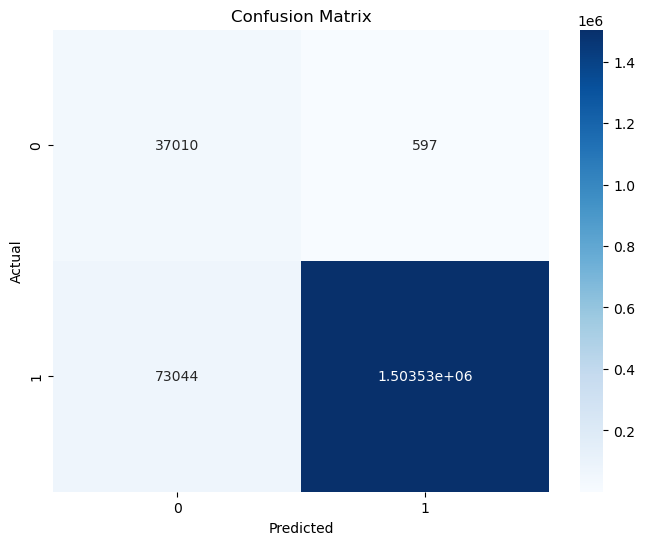

In [27]:
y_pred = lr.predict(X_test_scaled)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
print("Classification Report for train data:")
y_pred_train = lr.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_pred_train))

Classification Report for train data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   6968099
           1       1.00      0.99      0.99   6968099

    accuracy                           0.99  13936198
   macro avg       0.99      0.99      0.99  13936198
weighted avg       0.99      0.99      0.99  13936198



In [28]:
print("Classification Report for test data:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.98      0.50     37607
           1       1.00      0.95      0.98   1576575

    accuracy                           0.95   1614182
   macro avg       0.67      0.97      0.74   1614182
weighted avg       0.98      0.95      0.97   1614182



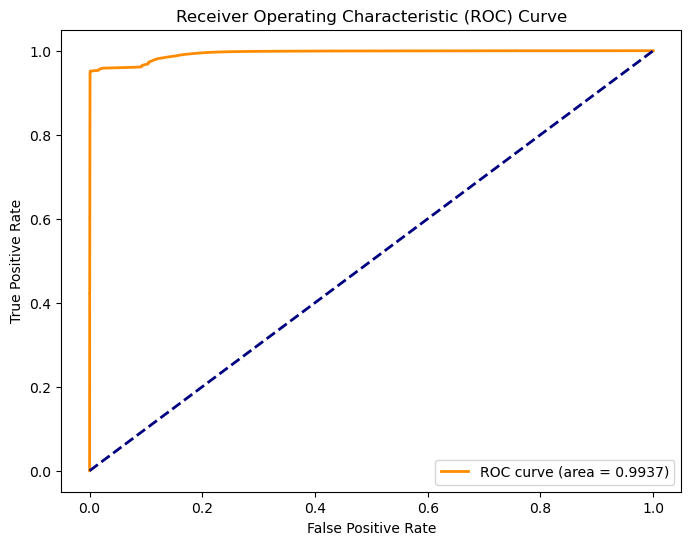

In [11]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:,1])
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
x_train_mc = combined_df.drop(columns=['file_name', 'attack_group', 'attack_group_binary'])
y_train_mc = combined_df['attack_group']

In [24]:
x_train_mc_scaled = scaler.fit_transform(x_train_mc)

In [28]:
# Build a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(x_train_mc_scaled, y_train_mc)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [47]:
# Save the trained model to a file
dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [12]:
# Load the saved model from file
rf = load('random_forest_model.pkl')

In [29]:
# Make predictions for train data
y_pred_train = rf.predict(x_train_mc_scaled)

# Compute classification report for train data
print("Classification Report:")
print(classification_report(y_train_mc, y_pred_train))


Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    192732
        DDoS       1.00      1.00      1.00   4779859
         DoS       1.00      1.00      1.00   1805529
        MQTT       1.00      1.00      1.00    262938
       Recon       1.00      1.00      1.00    103726
    Spoofing       1.00      1.00      1.00     16047

    accuracy                           1.00   7160831
   macro avg       1.00      1.00      1.00   7160831
weighted avg       1.00      1.00      1.00   7160831



In [13]:
# Make predictions for test data
y_pred = rf.predict(X_test_scaled_mc)
# Compute classification report for test data
print("Classification Report:")
print(classification_report(y_test_mc, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_mc, y_pred)

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     37607
        DDoS       1.00      1.00      1.00   1066764
         DoS       1.00      1.00      1.00    416676
        MQTT       1.00      1.00      1.00     63715
       Recon       1.00      1.00      1.00     27676
    Spoofing       1.00      0.98      0.99      1744

    accuracy                           1.00   1614182
   macro avg       1.00      1.00      1.00   1614182
weighted avg       1.00      1.00      1.00   1614182



In [15]:
labels = rf.classes_

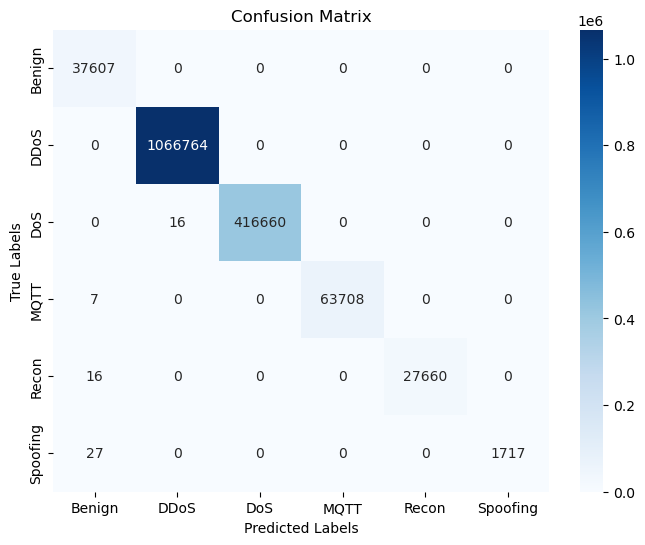

In [16]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [54]:
# Plot feature importance
feature_importance = rf.feature_importances_ 
# Get indices of top 10 features
top_indices = np.argsort(feature_importance)[::-1][:10]

# Get top 10 feature names and importances
top_feature_names = [x_test_mc.columns[i] for i in top_indices]
top_feature_importance = feature_importance[top_indices]

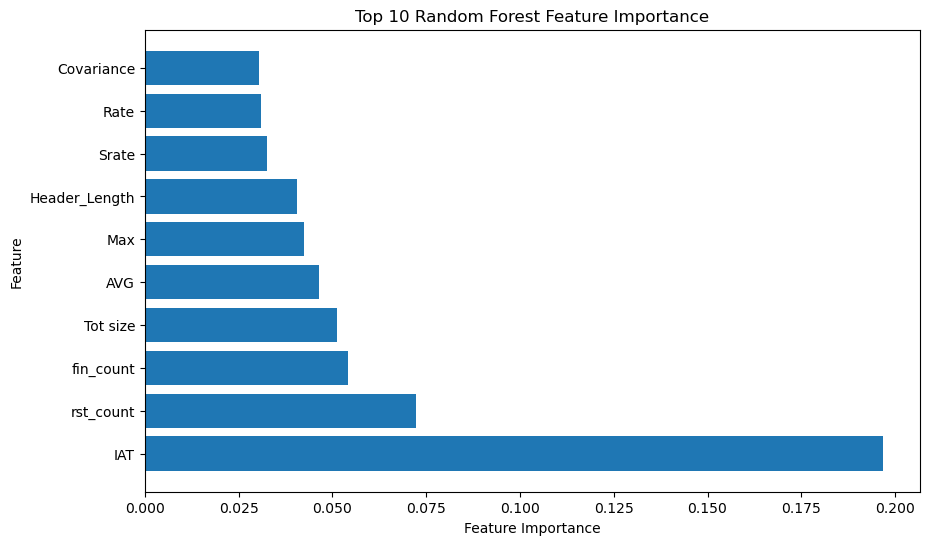

In [55]:
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Random Forest Feature Importance')
plt.show()